In [2]:
import pandas as pd

# Load the dataset to get an overview
file_path = 'ttc-bus-delay-data-2023.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50913 entries, 0 to 50912
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       50913 non-null  datetime64[ns]
 1   Route      50385 non-null  object        
 2   Time       50913 non-null  object        
 3   Day        50913 non-null  object        
 4   Location   50913 non-null  object        
 5   Incident   50913 non-null  object        
 6   Min Delay  50913 non-null  int64         
 7   Min Gap    50913 non-null  int64         
 8   Direction  42138 non-null  object        
 9   Vehicle    50913 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 3.9+ MB


(        Date Route   Time     Day               Location  \
 0 2023-01-01    91  02:30  Sunday  WOODBINE AND MORTIMER   
 1 2023-01-01    69  02:34  Sunday         WARDEN STATION   
 2 2023-01-01    35  03:06  Sunday           JANE STATION   
 3 2023-01-01   900  03:14  Sunday        KIPLING STATION   
 4 2023-01-01    85  03:43  Sunday         MEADOWALE LOOP   
 
                 Incident  Min Delay  Min Gap Direction  Vehicle  
 0              Diversion         81      111       NaN     8772  
 1               Security         22       44         S     8407  
 2  Cleaning - Unsanitary         30       60         N     1051  
 3               Security         17       17       NaN     3334  
 4               Security          1        1       NaN     1559  ,
 None)

Temporal Analysis

In [3]:
# For the temporal analysis, we will examine patterns related to the time of day, day of the week, and month.

# Extracting hour from Time for analysis
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

# Extracting month from Date for analysis
data['Month'] = data['Date'].dt.month

# Aggregating data for analysis by time of day, day of the week, and month
time_of_day_analysis = data.groupby('Hour').size()
day_of_week_analysis = data.groupby('Day').size()
month_analysis = data.groupby('Month').size()

time_of_day_analysis, day_of_week_analysis, month_analysis


(Hour
 0     1015
 1      680
 2      739
 3      628
 4      822
 5     1831
 6     2424
 7     2310
 8     2251
 9     2450
 10    2300
 11    2270
 12    2440
 13    2711
 14    3112
 15    3612
 16    3645
 17    3580
 18    3234
 19    2270
 20    1937
 21    1813
 22    1505
 23    1334
 dtype: int64,
 Day
 Friday       7974
 Monday       6990
 Saturday     7081
 Sunday       5418
 Thursday     7934
 Tuesday      7429
 Wednesday    8087
 dtype: int64,
 Month
 1     3859
 2     4191
 3     4231
 4     3886
 5     4073
 6     4271
 7     5239
 8     5231
 9     5049
 10    5561
 11    5322
 dtype: int64)

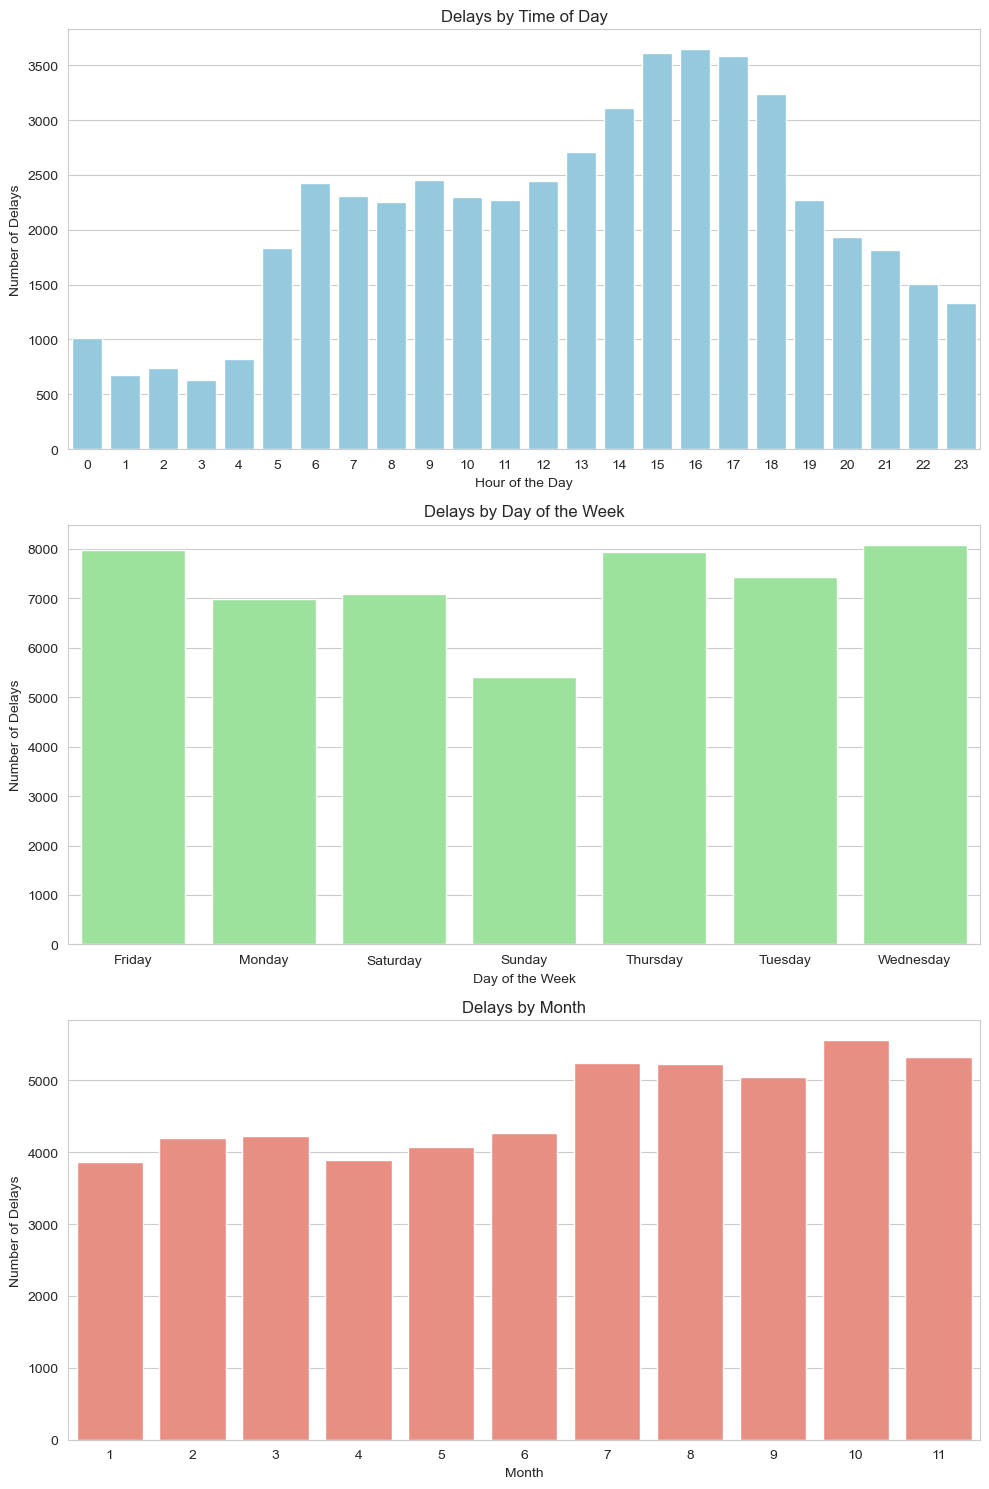

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating subplots for each analysis
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Time of Day Analysis
sns.barplot(x=time_of_day_analysis.index, y=time_of_day_analysis.values, ax=ax[0], color='skyblue')
ax[0].set_title('Delays by Time of Day')
ax[0].set_xlabel('Hour of the Day')
ax[0].set_ylabel('Number of Delays')

# Day of Week Analysis
sns.barplot(x=day_of_week_analysis.index, y=day_of_week_analysis.values, ax=ax[1], color='lightgreen')
ax[1].set_title('Delays by Day of the Week')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Number of Delays')

# Month Analysis
sns.barplot(x=month_analysis.index, y=month_analysis.values, ax=ax[2], color='salmon')
ax[2].set_title('Delays by Month')
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Number of Delays')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Spatial Analysis

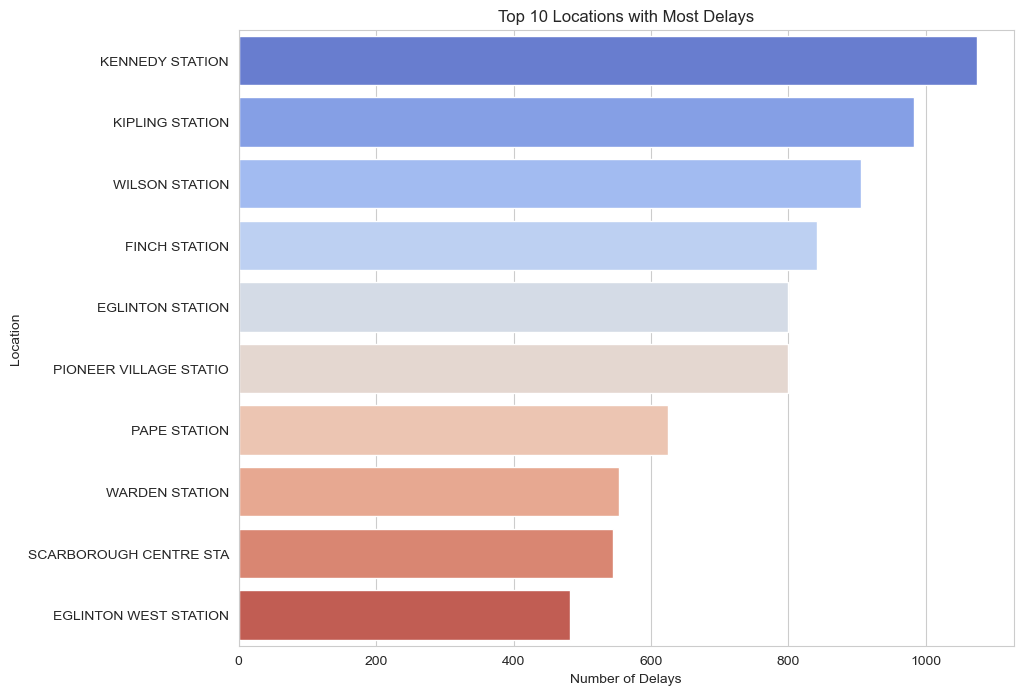

In [9]:
# For spatial analysis, we will focus on the locations with the highest frequencies of delays.

# Aggregating data to identify the top 10 locations with the most delays
location_analysis = data['Location'].value_counts().head(10)

# Visualizing the top 10 locations with the most delays
plt.figure(figsize=(10, 8))
sns.barplot(y=location_analysis.index, x=location_analysis.values, palette='coolwarm')
plt.title('Top 10 Locations with Most Delays')
plt.xlabel('Number of Delays')
plt.ylabel('Location')
plt.show()


Incident Analysis

In [11]:
# Calculating the average delay by incident type
average_delay_by_incident = data.groupby('Incident')['Min Delay'].mean().sort_values(ascending=False)

average_delay_by_incident.head(10)

Incident
Diversion                           109.417178
Held By                              66.726027
Road Blocked - NON-TTC Collision     59.953191
General Delay                        24.692334
Cleaning - Unsanitary                14.615385
Operations - Operator                14.010758
Vision                               13.882006
Utilized Off Route                   13.203198
Mechanical                           13.179323
Collision - TTC                      11.934499
Name: Min Delay, dtype: float64

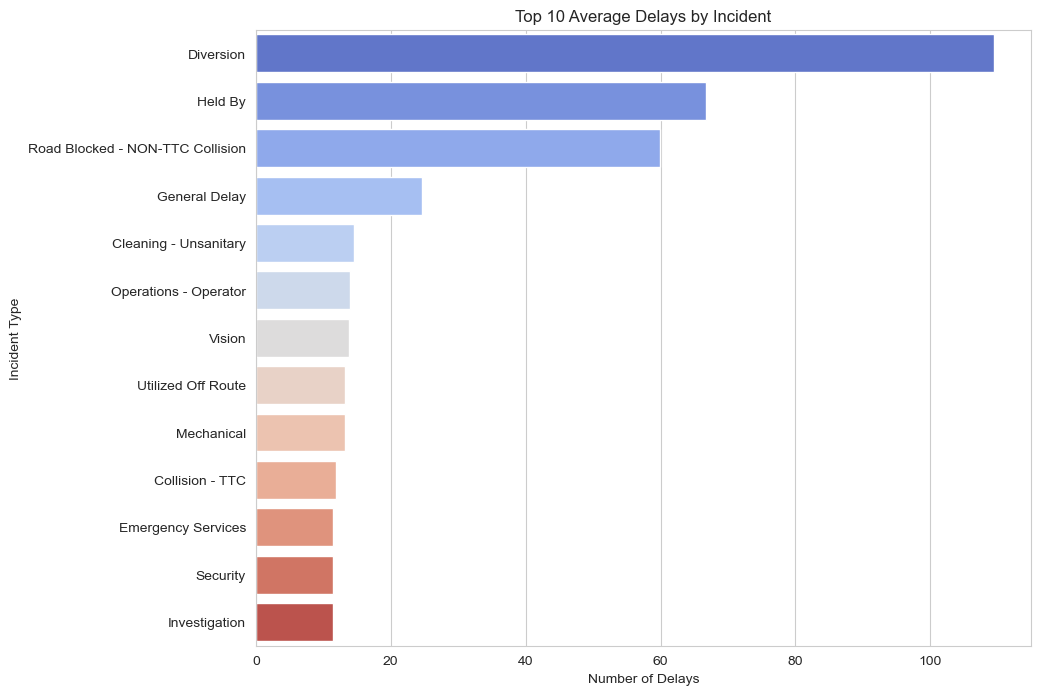

In [12]:
# Visualizing the top 10 incidents
plt.figure(figsize=(10, 8))
sns.barplot(y=average_delay_by_incident.index, x=average_delay_by_incident.values, palette='coolwarm')
plt.title('Top 10 Average Delays by Incident')
plt.xlabel('Number of Delays')
plt.ylabel('Incident Type')
plt.show()


Route and Vehicle Analysis

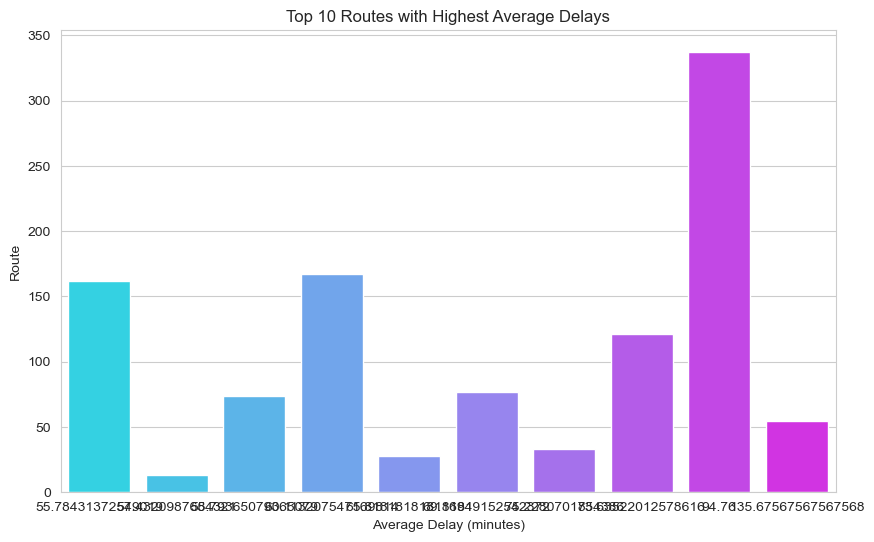

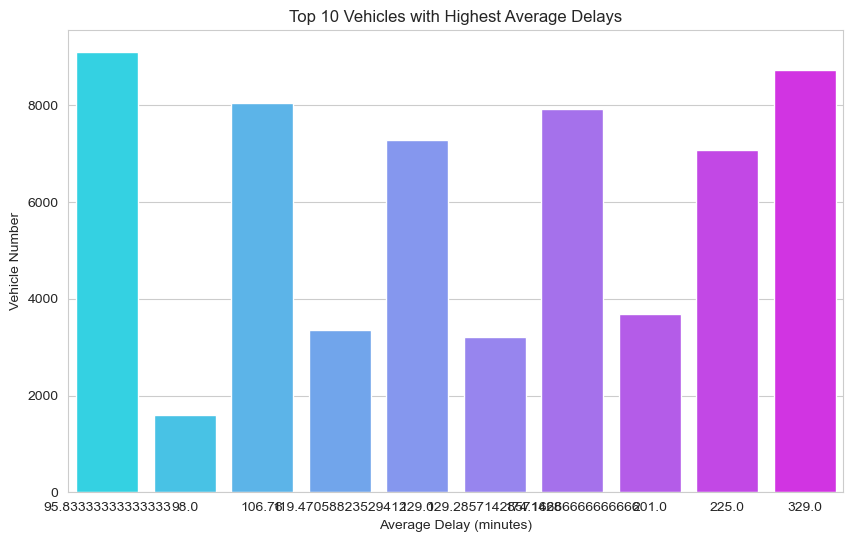

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Route Analysis
average_delay_by_route = data.groupby('Route')['Min Delay'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_delay_by_route.values, y=average_delay_by_route.index, palette='cool')
plt.title('Top 10 Routes with Highest Average Delays')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Route')
plt.show()

# Vehicle Analysis
average_delay_by_vehicle = data.groupby('Vehicle')['Min Delay'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_delay_by_vehicle.values, y=average_delay_by_vehicle.index, palette='cool')
plt.title('Top 10 Vehicles with Highest Average Delays')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Vehicle Number')
plt.show()


In [29]:
average_delay_by_route

Route
55     135.675676
337     94.760000
121     83.635220
33      75.228070
77      69.169492
28      65.818182
167     60.113208
74      58.793651
13      57.432099
162     55.784314
Name: Min Delay, dtype: float64